## 局部加权线性回归

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [7]:
# 生成数据点
x = np.linspace(1, 101, 100)
print(len(x))
x = np.array([float(i) for i in x])
y =x + [10 * np.sin(0.3*i) for i in x] + stats.norm.rvs(size=100, loc=0, scale=1.5)

100


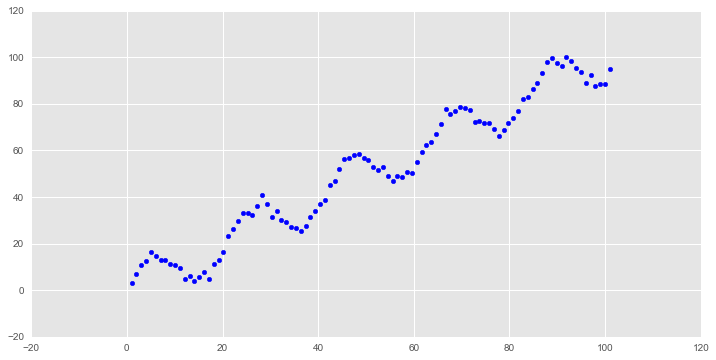

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(x, y, s=20, color='b')
plt.xlim(-20, 120)
plt.ylim(-20, 120);

y=1.4474490766150936+0.9738130026136921x


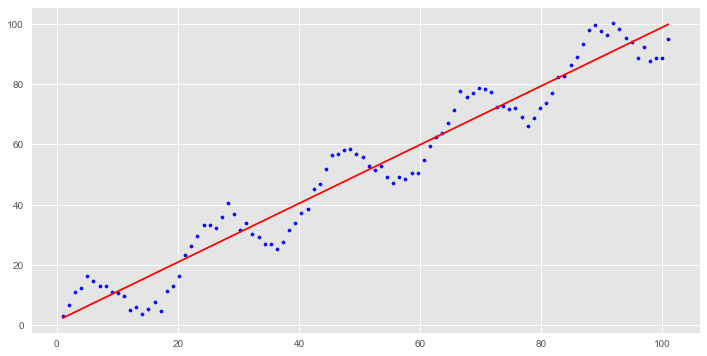

In [16]:
# 首先用最小二次拟合数据
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.figure(figsize=(12,6))
y_coef = intercept + slope * x
plt.plot(x, y_coef, 'r')
plt.scatter(x, y, color='b', s=10)
print('y=' + str(intercept) + '+' + str(slope) + 'x')

<p>1.用高斯核函数计算出第ｉ个样本处，其它所有样本点的权重Ｗ</p>
<p>2.用权重ｗ对第ｉ个样本作加权线性回归，得到回归方程，即拟合的直线方程</p>
<p>3.用刚才得到的经验回归直线计算出xi处的估计值y^i</p>
<p>4.重复一至三步，得到每个样本点的估计值</p>

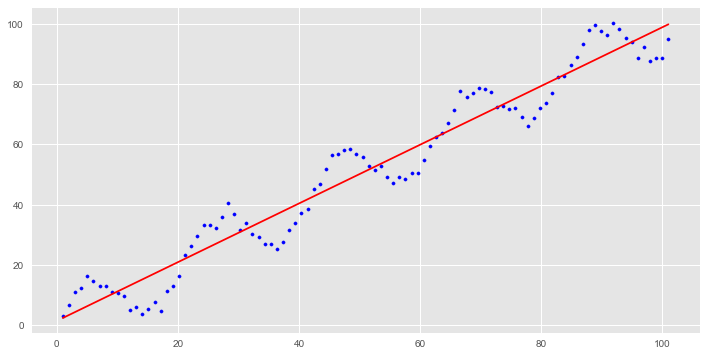

In [20]:
import statsmodels.api as sm
# 局部加权线性回归里的权值的平方根
def get_sqrtW(x0, k):
    w = np.zeros(len(x))
    for i in range(len(x)):
        w[i] = np.exp(-(x[i] - x0)**2 / (2 * k * k))
    w = np.array([np.sqrt(i) for i in w])
    return w

def get_yLocal(k):
    yHat = np.zeros(len(x))
    for i in range(len(x)):
        w = get_sqrtW(x[i], k)
        x2 = w * x
        x2 = x2[x2 > 0]
        y2 = w * y
        y2 = y2[y2 > 0]
        X = np.zeros((1, len(x2)))
        X[0] = x2
        X = X.T
        X = sm.add_constant(X, has_constant='skip')
        X[:,0] = w[w > 0]
        Y = y2
        model = sm.OLS(Y, X)
        results = model.fit()
        a = results.params[0]
        b = results.params[1]
        yHat[i] = a + b * x[i]
    return yHat

y_local = get_yLocal(100000)
plt.figure(figsize=(12, 6))
plt.plot(x, yHat, 'r')
plt.scatter(x, y, s=10, color='b');

In [21]:
data = pd.DataFrame()
data['y'] = y
data['y_coef'] = y_coef
data['y_local'] = y_local
data.head()

,y,y_coef,y_local
0,3.024025,2.421262,2.421262
1,6.774743,3.404912,3.404911
2,11.031260,4.388561,4.388561
3,12.385574,5.372211,5.372210
4,16.222407,6.355860,6.355860


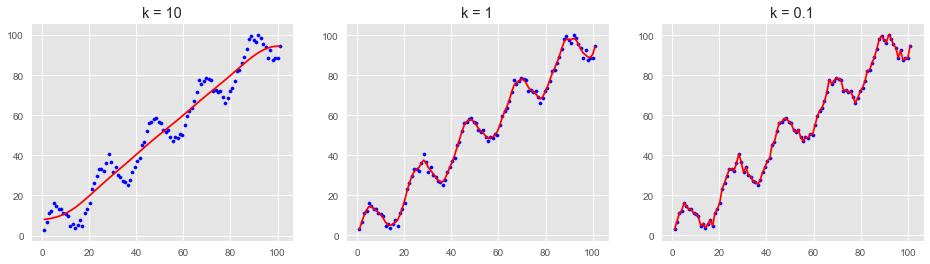

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

y_local1 = get_yLocal(k=10)
ax[0].plot(x, y_local1, 'r')
ax[0].scatter(x, y, s=10, color='b');
ax[0].set_title('k = 10')

y_local2 = get_yLocal(k=1)
ax[1].plot(x, y_local2, 'r')
ax[1].scatter(x, y, s=10, color='b');
ax[1].set_title('k = 1')

y_local3 = get_yLocal(k=0.1)
ax[2].plot(x, y_local3, 'r')
ax[2].scatter(x, y, s=10, color='b');
ax[2].set_title('k = 0.1');
